In [1]:
from firedrake import *
import numpy as np
import matplotlib.pyplot as plt

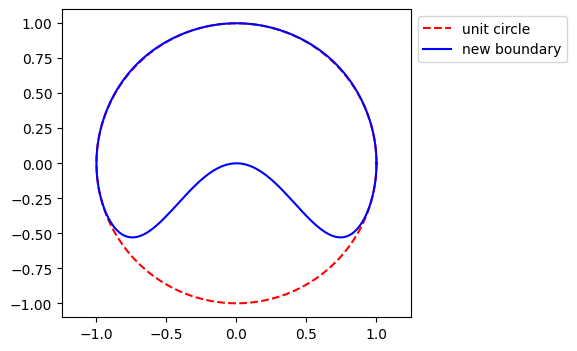

In [19]:
def bdy_shape(x, y):
    g = (x, y + 1/4*(x-1)**2*(x+1)**2*(y-1)**2)
    return g

theta = np.linspace(0, 2*pi, 200)
x = np.cos(theta)
y = np.sin(theta)

x_bdy, y_bdy = bdy_shape(x, y)

fig, ax = plt.subplots(figsize=[4.5, 4])

ax.axis('equal')
ax.plot(x, y, 'r--', label='unit circle')
ax.plot(x_bdy, y_bdy, 'b-', label='new boundary')
ax.legend(bbox_to_anchor=(1, 1))

(-1.1, 1.1, -0.6059802045920015, 1.0764752478377144)

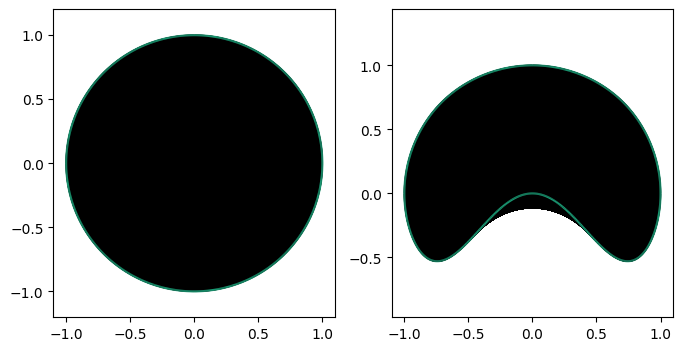

In [20]:
mesh = UnitDiskMesh(refinement_level=7)

V = VectorFunctionSpace(mesh, 'CG', 1)

g = bdy_shape(*SpatialCoordinate(mesh))
bc = DirichletBC(V, g, 'on_boundary')

u, v = TrialFunction(V), TestFunction(V)

a = inner(grad(u), grad(v))*dx

L = inner(Constant((0, 0)),v)*dx

u = Function(V)
solve(a == L, u, bcs=bc)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])

triplot(mesh, axes=ax[0])
ax[0].axis('equal')

# mesh.coordinates.assign(u)
mesh_new = Mesh(u)
triplot(mesh_new, axes=ax[1])
ax[1].axis('equal')